In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [2]:
albedo_bottom=pd.read_csv("Mercury/mercury-albedo-resized-bottom-half.png.csv",header=None)
albedo_top=pd.read_csv("Mercury/mercury-albedo-top-half.png.csv",header=None)
Al_2_Si=pd.read_csv("Mercury/alsimap_smooth_032015.png.csv",header=None)
Ca_2_Si=pd.read_csv("Mercury/casimap_smooth_032015.png.csv",header=None)
Fe_2_Si=pd.read_csv("mercury/fesimap_smooth_032015.png.csv",header=None)
Mg_2_Si=pd.read_csv("Mercury/mgsimap_smooth_032015.png.csv",header=None)
S_2_Si=pd.read_csv("Mercury/ssimap_smooth_032015.png.csv",header=None)

In [3]:
albedo_top_arr=albedo_top.values

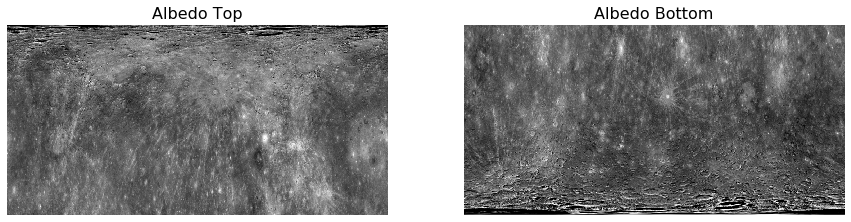

In [4]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.imshow(albedo_top_arr,cmap="gray")
plt.title("Albedo Top",fontsize=16)
plt.axis("off")
plt.subplot(1,2,2)
plt.title("Albedo Bottom",fontsize=16)
plt.imshow(albedo_bottom.values,cmap="gray")
plt.axis("off")
plt.show()

In [5]:
Ratio_list=[Al_2_Si,Ca_2_Si,Fe_2_Si,Mg_2_Si,S_2_Si]
title_list=["Al_2_Si","Ca_2_Si","Fe_2_Si","Mg_2_Si","S_2_Si"]

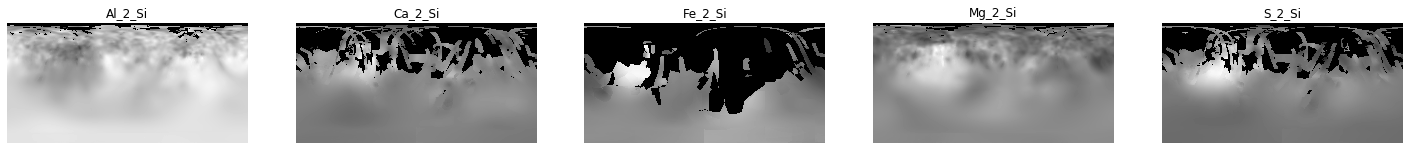

In [6]:
plt.figure(figsize=(25,15))
for i in range(len(Ratio_list)):
    plt.subplot(1,len(Ratio_list),i+1)
    plt.title(title_list[i])
    plt.imshow(Ratio_list[i].values,cmap="gray")
    plt.axis("off")
plt.show()

- Except Fe_2_Si ratio all the other ratio compositions have only non-zero values of pixels after 25th pixel and Fe_2_Si have 187 zeros zeros 

## Cleaning Data -Checking For Null Rows From All Ratio Data

In [7]:
for z in range(len(Ratio_list)):
    zero_rows=[]
    val=(Ratio_list[z]==0).sum(axis=1)
    for i,j in enumerate(val):
        if j==1440:
            zero_rows.append(i)
    print(title_list[z]+"-",zero_rows)

Al_2_Si- [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 17, 719]
Ca_2_Si- [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 719]
Fe_2_Si- [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 719]
Mg_2_Si- [0, 1, 2, 3, 4, 5, 6, 7, 719]
S_2_Si- [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 719]


In [8]:
common_zero_rows=[0,1,2,3,4,5,6,7,719]
## Dropping gthe rows column in 5 Ratio data 
for i in range(len(Ratio_list)):
    Ratio_list[i].drop(common_zero_rows,inplace=True)

In [9]:
albedo_top.drop(common_zero_rows,inplace=True)

## Finding Corrleation with Albedo Top

In [10]:
column_names=['Albedo_Corr_Al2Si',"Albedo_Corr_Ca2Si","Albedo_Corr_Fe2Si","Albedo_Corr_Mg2Si","Albedo_Corr_S2Si"]

In [11]:
corr_df=pd.DataFrame([])  # Creating a empty correlation dataframe

In [12]:
def correlation(data1,data2,col_name):
    value=pd.Series(data1.corrwith(data2),name=col_name)
    corr_df[col_name]=value
    return

In [13]:
for i in range(len(Ratio_list)):
    col_name=column_names[i]
    data2=Ratio_list[i]
    correlation(albedo_top,data2,col_name) 

In [14]:
corr_df   #correlation dataframe columnwise with all ratio image(s) and albedo image

,Albedo_Corr_Al2Si,Albedo_Corr_Ca2Si,Albedo_Corr_Fe2Si,Albedo_Corr_Mg2Si,Albedo_Corr_S2Si
0,0.202091,0.400352,0.408216,0.461354,0.397197
1,0.205130,0.395004,0.421441,0.477106,0.389004
2,0.188690,0.378841,0.384371,0.471909,0.381011
3,0.206196,0.341458,0.363354,0.456168,0.333730
4,0.223554,0.285967,0.305647,0.410136,0.291319
...,...,...,...,...,...
1435,0.128904,0.378508,0.318737,0.416559,0.399495
1436,0.091418,0.375316,0.326120,0.440794,0.394276
1437,0.140661,0.367907,0.332394,0.452880,0.383770
1438,0.170024,0.418323,0.394905,0.448706,0.428999


- These correlation are very low as compared to moon albedo with respect to the elemts present in the moon albedo.

## Compositions

In [15]:
combo=Al_2_Si+Ca_2_Si+Fe_2_Si+Mg_2_Si+S_2_Si

In [16]:
total=combo/albedo_top   # combo divided by albedo top to the total configuration

In [17]:
Al_2_Si,Ca_2_Si,Fe_2_Si,Mg_2_Si,S_2_Si=Al_2_Si/total,Ca_2_Si/total,Fe_2_Si/total,Mg_2_Si/total,S_2_Si/total
#Getting individual composition

In [18]:
updated_ratio_list=[Al_2_Si,Ca_2_Si,Fe_2_Si,Mg_2_Si,S_2_Si]

In [19]:
for i in range(len(updated_ratio_list)):
    updated_ratio_list[i].fillna(0,inplace=True)

In [20]:
combine_individual=Al_2_Si+Ca_2_Si+Fe_2_Si+Mg_2_Si+S_2_Si

In [21]:
combine_individual.describe()

,0,1,2,3,4,5,6,7,8,9,...,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439
count,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,...,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000
mean,0.395428,0.393083,0.390138,0.384446,0.383801,0.378594,0.379239,0.378396,0.373305,0.373426,...,0.406944,0.403442,0.400077,0.394948,0.399796,0.399294,0.401241,0.399035,0.395841,0.400634
std,0.118071,0.113725,0.108106,0.100557,0.099451,0.101498,0.100593,0.103776,0.106072,0.105834,...,0.126442,0.129167,0.131219,0.130700,0.131009,0.136322,0.136226,0.126397,0.122379,0.127849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.329412,0.333333,0.333333,0.329412,0.329412,0.321569,0.325490,0.325490,0.317647,0.317647,...,0.341176,0.341176,0.337255,0.333333,0.335294,0.325490,0.329412,0.325490,0.325490,0.325490
50%,0.384314,0.384314,0.388235,0.384314,0.388235,0.380392,0.384314,0.384314,0.372549,0.372549,...,0.403922,0.396078,0.388235,0.384314,0.388235,0.388235,0.384314,0.392157,0.388235,0.388235
75%,0.454902,0.447059,0.450980,0.450980,0.447059,0.435294,0.439216,0.435294,0.435294,0.435294,...,0.466667,0.462745,0.447059,0.439216,0.450980,0.447059,0.460784,0.454902,0.449020,0.454902
max,0.847059,0.850980,0.737255,0.631373,0.737255,0.737255,0.647059,0.745098,0.701961,0.647059,...,0.741176,0.831373,0.854902,0.792157,0.839216,0.901961,0.909804,0.874510,0.835294,0.921569


In [22]:
albedo_top.describe()

,0,1,2,3,4,5,6,7,8,9,...,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439
count,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,...,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000
mean,0.398097,0.395930,0.393050,0.387259,0.386415,0.380878,0.381661,0.381120,0.376322,0.376658,...,0.413204,0.409691,0.405990,0.400673,0.403646,0.402460,0.404352,0.401715,0.398776,0.403502
std,0.112233,0.107241,0.101289,0.093570,0.092666,0.095627,0.094660,0.098204,0.100736,0.100202,...,0.116756,0.120341,0.122614,0.122004,0.124781,0.130437,0.130105,0.120288,0.115912,0.121933
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.329412,0.333333,0.333333,0.329412,0.329412,0.321569,0.325490,0.325490,0.321569,0.317647,...,0.345098,0.341176,0.337255,0.337255,0.337255,0.325490,0.329412,0.325490,0.325490,0.329412
50%,0.384314,0.384314,0.388235,0.384314,0.388235,0.380392,0.384314,0.384314,0.372549,0.372549,...,0.403922,0.396078,0.392157,0.388235,0.388235,0.388235,0.384314,0.392157,0.388235,0.388235
75%,0.454902,0.447059,0.450980,0.450980,0.447059,0.435294,0.439216,0.435294,0.435294,0.435294,...,0.466667,0.462745,0.450980,0.443137,0.450980,0.447059,0.460784,0.454902,0.449020,0.454902
max,0.847059,0.850980,0.737255,0.631373,0.737255,0.737255,0.647059,0.745098,0.701961,0.647059,...,0.741176,0.831373,0.854902,0.792157,0.839216,0.901961,0.909804,0.874510,0.835294,0.921569


## Building Regression Model

In [23]:
lr=LinearRegression()

In [24]:
lr.fit(combine_individual,albedo_top)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
pred=lr.predict(albedo_bottom.values)

In [26]:
weights_learned=lr.coef_[0]
intercept=lr.intercept_

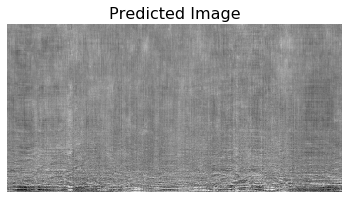

In [27]:
plt.imshow(pred,cmap="gray")
plt.axis("off")
plt.title("Predicted Image",fontsize=16)
plt.show()

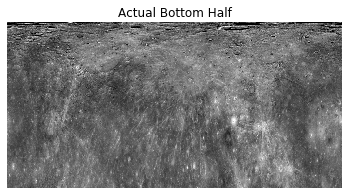

In [28]:
plt.imshow(albedo_top.values,cmap="gray")
plt.axis("off")
plt.title("Actual Bottom Half")
plt.show()

In [29]:
lr.score(combine_individual,albedo_top)

1.0